# Some EDA ideas



In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [5]:
# Code will always show rows first, then cols. So it is 773 rows in the shape atribute
df = pd.read_csv("Preliminary database.csv")
df.shape

(773, 14)

In [8]:
# Getting a list representation of the columns, handy for copy-pasting
df.columns.tolist()

['Unnamed: 0',
 'Title',
 'CELEX number',
 'ECLI identifier',
 'Transposed legal act(s)',
 'Type of procedure',
 'National court',
 'Country or organisation from which the request originates',
 'Date of document',
 'Author',
 'Document year',
 'Applicant/Appellant',
 'Defendant/Other parties to the proceedings',
 'Text']

In [7]:
# Getting rid of empty cases, down to 510
df.dropna(subset=["Text"],inplace=True)
df.shape

(510, 14)

In [54]:
df.head().T

,1,3,6,7,8
Unnamed: 0,1,3,6,7,8
Title,Judgment of the Court (Sixth Chamber) of 18 Se...,Judgment of the Court (Fifth Chamber) of 29 Ju...,Judgment of the Court (Fifth Chamber) of 23 Ma...,Judgment of the General Court (Third Chamber) ...,Judgment of the General Court (Fourth Chamber)...
CELEX number,62018CJ0366,62017CJ0654,62017CJ0720,62017TJ0107,62015TJ0604
ECLI identifier,ECLI:EU:C:2019:757,ECLI:EU:C:2019:634,ECLI:EU:C:2019:448,ECLI:EU:T:2019:353,ECLI:EU:T:2019:348
Transposed legal act(s),NaN,NaN,NaN,NaN,NaN
Type of procedure,Reference for a preliminary ruling - inadmissi...,"Action for annulment, Appeal - inadmissible, A...",Reference for a preliminary ruling,Action for damages - unfounded,Action for annulment - unfounded
National court,"*A9* Juzgado de lo Social de Madrid, Auto de 2...",NaN,"*A9* Verwaltungsgerichtshof, Beschluss vom 14/...",NaN,NaN
Country or organisation from which the request originates,"Spain, Spain","Germany, Germany","Austria, Austria","Germany, Germany","Belgium, Belgium"
Date of document,2019-09-18,2019-07-29,2019-05-23,2019-05-23,2019-05-22
Author,"Court of Justice, Hogan","Tanchev, Court of Justice","Bot, Court of Justice",General Court,General Court


In [48]:
# Here we can see that the cols are not proper dates, so it is necessary to put an actionable date and year below
print(type(df['Document year'][8]),
      type(df['Date of document'][8]))

<class 'numpy.int64'> <class 'str'>


In [49]:
df['date'] = pd.to_datetime(df['Date of document'])
df['year'] = pd.DatetimeIndex(df['date']).year
print(type(df['date'][8]),
      type(df['year'][8]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'> <class 'numpy.int64'>


In [11]:
# This might need to be regimented, it has too many categories, we want say 3 succesful, unsuccesful, neutral
df['Type of procedure'].value_counts()

Reference for a preliminary ruling                                                                              131
Action for annulment - unfounded                                                                                 62
Action for annulment - successful                                                                                21
Action for annulment - successful, Action for annulment - unfounded                                              11
Action for annulment, Appeal - unfounded                                                                         11
                                                                                                               ... 
Appeal - successful, Action for damages, Staff cases                                                              1
Appeal against penalty, Appeal - unfounded, Action for annulment, Appeal - inadmissible                           1
Action for damages - unfounded, Action for damages - successful, Action 

In [14]:
# For cases like "Belgium, Italy" we need to have a list instead of a string, and then use explode
# Something weird in how countires are named twice, this needs to be corrected
df['Country or organisation from which the request originates'].value_counts()

Third countries                                             64
Germany, Germany                                            54
Italy, Italy                                                38
France, France                                              35
Spain, Spain                                                33
                                                            ..
Luxembourg, Italy, Italy, Luxembourg                         1
Belgium, Italy, Italy, Belgium                               1
United Kingdom, Netherlands, Netherlands, United Kingdom     1
Luxembourg, Third countries, Luxembourg                      1
Luxembourg                                                   1
Name: Country or organisation from which the request originates, Length: 74, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

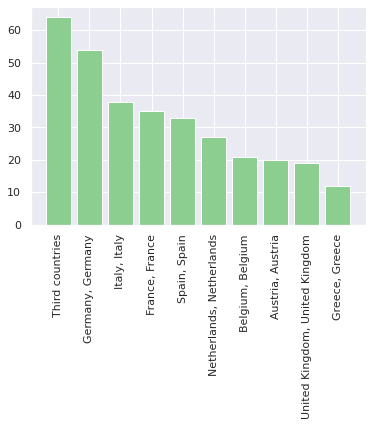

In [53]:
# a start could be cases by country of origin
sns.set(palette="Greens_d")
plt.bar(df['Country or organisation from which the request originates'].value_counts().nlargest(10).index,
         df['Country or organisation from which the request originates'].value_counts().nlargest(10).values)
plt.xticks(rotation=90)
#plt.xticks(labels=[df['Country or organisation from which the request originates'].value_counts().nlargest(10).index.tolist()],rotation=90)


/home/gmascode/miniconda3/envs/gus_1/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

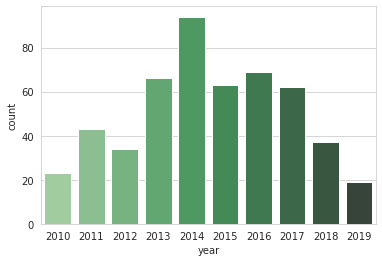

In [52]:
# or by year
sns.countplot(df['year'], palette="Greens_d")

# suggestions

Lets try to do numbers for
* succesful / unsuccesful cases, 
* cases by interpretation technique, 
* cases by country of origin, 
* cases by year
and all the above crosscutting each other (ie. succesful/unsuccesful by country, succesful unsuccesful by year)

reporting the data, liking it to legal doctrine, and making the code and database open should be enough for a thesis


# work in progress...

In [76]:
# the idea is to filter the df for only the 3 largest types of procedures. Uses value counts index to create a list,
# and then passes the list to the df boolean indexing
three_main = df['Type of procedure'].value_counts().nlargest(3).index
three_main = list(three_main)
df2 = df[df['Type of procedure'].isin(three_main)]
df2.shape

(214, 16)

In [77]:
## have to find how to groupby and plot

In [89]:
dfxtab = pd.crosstab(index=df2['year'],columns=df2['Type of procedure'])
dfxtab

Type of procedure,Action for annulment - successful,Action for annulment - unfounded,Reference for a preliminary ruling
year,,,
2010,1,1,5
2011,1,2,8
2012,1,6,14
2013,4,3,18
2014,0,13,32
2015,4,15,13
2016,2,5,15
2017,2,11,12
2018,3,4,9


# Cleaining part 1
here is some effort to sort the country of origin, note that it fails becaue of leading whitespace in the list

In [103]:
def country_set1(a_string):
    try:
        a_list = a_string.split(",")
        return list(set(a_list))
    except:
        return "not possible"
    
    

In [101]:
df2['Country or organisation from which the request originates'].apply(country_set1)

6                    [ Austria, Austria]
8                    [Belgium,  Belgium]
11                   [ Austria, Austria]
13                   [ Austria, Austria]
17     [ Italy,  Third countries, Italy]
                     ...                
754                  [Germany,  Germany]
758                    [Third countries]
764                      [ Italy, Italy]
769                    [ Greece, Greece]
770                      [ Italy, Italy]
Name: Country or organisation from which the request originates, Length: 214, dtype: object

In [104]:

def country_set2(a_string):
    try:
        a_list = a_string.split(",")
        b_list = [x.strip() for x in a_list]
        return list(set(b_list))
    except:
        return "not possible"
    

Now it works!

In [110]:
df2['Country or organisation from which the request originates'].apply(country_set2)

6                     [Austria]
8                     [Belgium]
11                    [Austria]
13                    [Austria]
17     [Third countries, Italy]
                 ...           
754                   [Germany]
758           [Third countries]
764                     [Italy]
769                    [Greece]
770                     [Italy]
Name: Country or organisation from which the request originates, Length: 214, dtype: object

In [ ]:
# from here on it is a bit messy

In [108]:
df2['origin'] = df2['Country or organisation from which the request originates'].apply(country_set2)

/home/gmascode/miniconda3/envs/gus_1/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [109]:
#now better but I am doing something illegal here
df2['origin'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Germany]                                       26
[Third countries]                               21
[Italy]                                         19
[Spain]                                         17
[Austria]                                       14
[France]                                        13
[Netherlands]                                   13
[Belgium]                                       12
[United Kingdom]                                 9
[Hungary]                                        8
[Czechia]                                        7
[Poland]                                         6
[Slovakia]                                       5
[Latvia]                                         4
[Bulgaria]                                       3
[Lithuania]                                      3
[Denmark]                                        3
[Estonia]                                        3
[Ireland]                                        3
[Greece]                       

In [113]:
# Explode unstacks problem cases like [Ireland, United Kingdom]
# This results in a larger df
df3 = df2.explode('origin')
print(df2.shape, df3.shape)

(214, 17) (228, 17)


In [114]:
# but also better value_counts
df3.origin.value_counts()

Germany            28
Third countries    26
Italy              20
Spain              18
Netherlands        15
Belgium            15
Austria            14
France             14
United Kingdom     12
Hungary             9
Poland              7
Czechia             7
Slovakia            5
Latvia              4
Ireland             4
Denmark             3
Estonia             3
Lithuania           3
Luxembourg          3
Bulgaria            3
not possible        2
Sweden              2
Portugal            2
Greece              2
Finland             2
Slovenia            1
Romania             1
Iran                1
XX                  1
Malta               1
Name: origin, dtype: int64